In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv("C:\LCIT\SEMESTER_1\AISC1006_SP\Fraud.csv")

In [3]:
#Shape of dataset
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#Summary Statistics
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


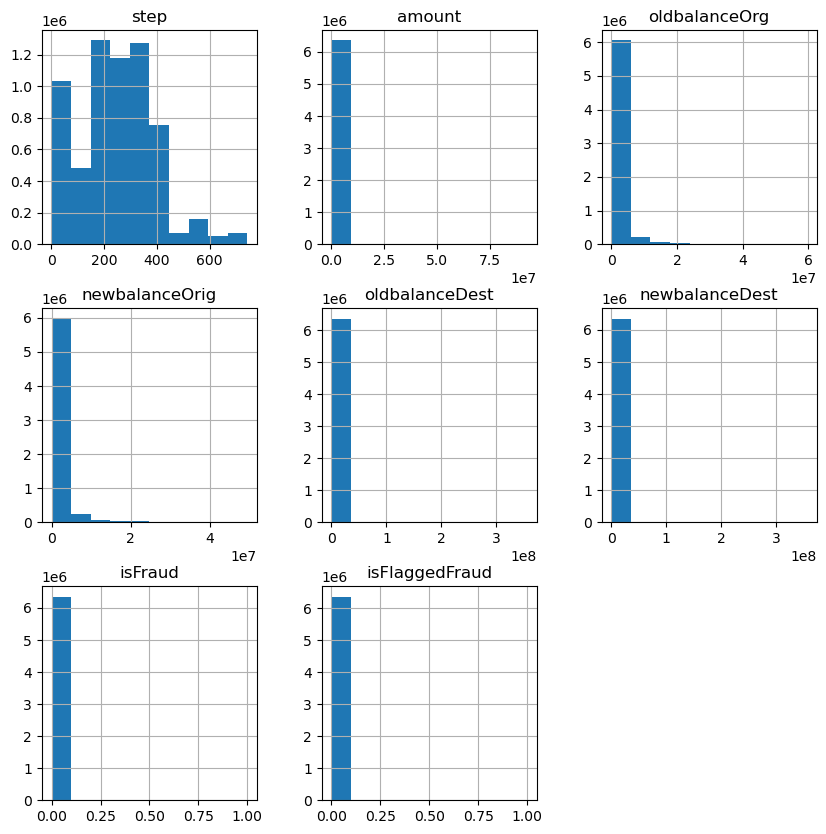

In [8]:
#Histrograms
df.hist(figsize=(10, 10))
plt.show()

In [9]:
#Checking noise in dependent parameters
dataUnq=[df.isFraud.unique(), df.isFlaggedFraud.unique()]
dataUnq

[array([0, 1], dtype=int64), array([0, 1], dtype=int64)]

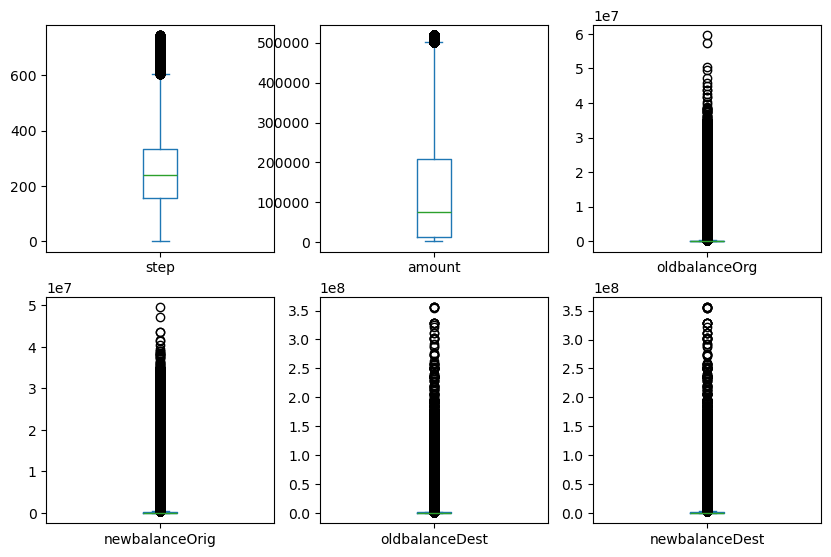

0            9839.64
1            2224.10
2            2224.10
3            2224.10
4           11668.14
             ...    
6362615    339682.13
6362616    518634.19
6362617    518634.19
6362618    518634.19
6362619    518634.19
Name: amount, Length: 6362620, dtype: float64

In [50]:
#Box Plots to find outliers
dataNum=df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']]
dataNum.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False, figsize=(10,10))
plt.show()

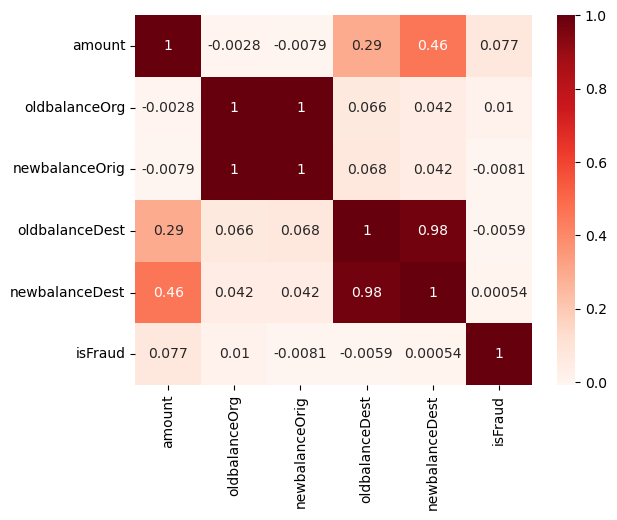

In [11]:
#Coorelation matrix
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

In [28]:
#Data Splitting 60,20,20
from sklearn.model_selection import train_test_split

#Split data into train and temp sets(test_size=0.4, means 40% of data to test, 60% to train)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)

# Then split temp into validation and test(test_size=0.5, half of temp data, means 20% for val, test each)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#Check Shapes
print("Train dataset shape:",train_data.shape)
print("validation dataset shape:",validation_data.shape)
print("Test dataset shape:",test_data.shape)


Train dataset shape: (3817572, 11)
validation dataset shape: (1272524, 11)
Test dataset shape: (1272524, 11)


In [30]:
#Data Preprocessing

In [ ]:
#no missing values in data
#outliers in data 
#numeric features [step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]
#Categorial features[type, nameOrig, nameDest, isFraud, isFlaggedFraud]

In [61]:
#Using Winsorization method to handle outliers in numeric features
#It Cap the extreme values by replacing them with the nearest non-outlier value.

from scipy.stats.mstats import winsorize
# Define the numeric features
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Apply Winsorization to each numeric feature
for feature in numeric_features:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])

# Check the modified DataFrame
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0    16   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1    16   PAYMENT   2224.10  C1666544295        21249.0        19384.72   
2    16  TRANSFER   2224.10  C1305486145          181.0            0.00   
3    16  CASH_OUT   2224.10   C840083671          181.0            0.00   
4    16   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


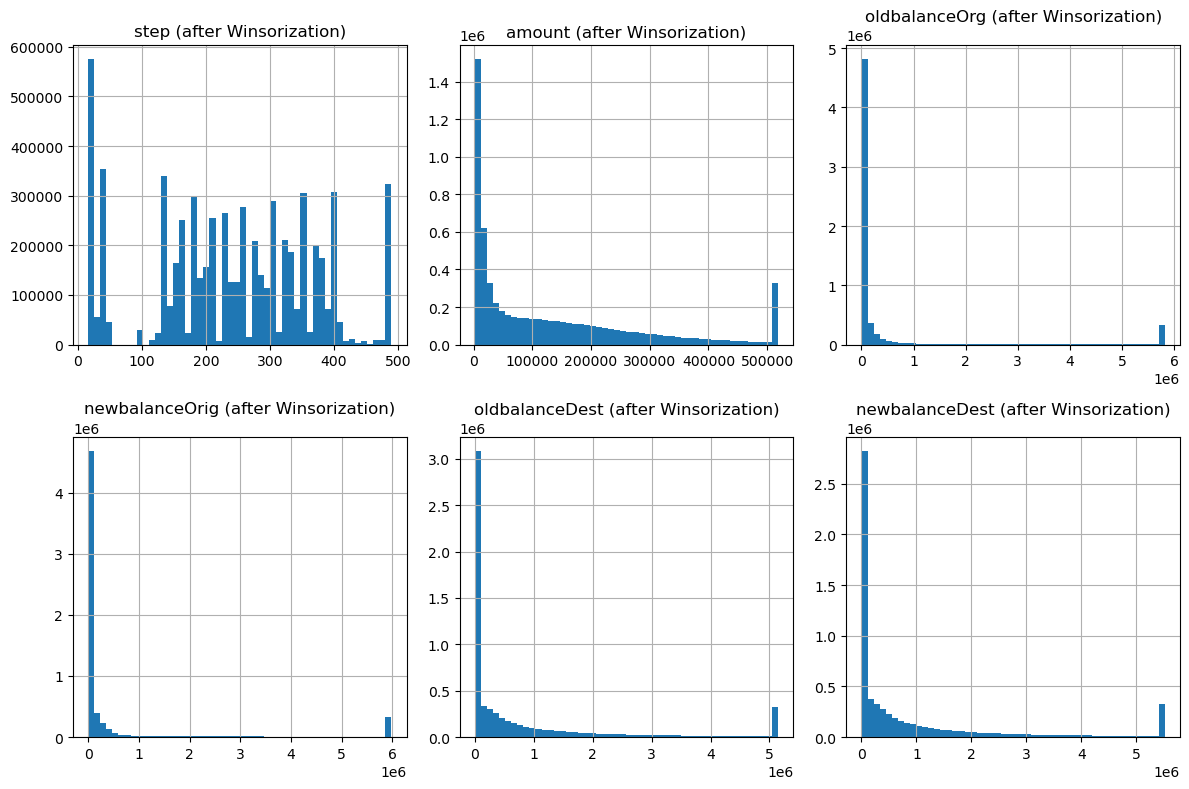

In [63]:
## Visualizing Numerical features with bar plots after applying Winsorization

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    df[feature].hist(bins=50)
    plt.title(f'{feature} (after Winsorization)')
plt.tight_layout()
plt.show()

In [73]:
#Dropping High Cardinality Features [nameOrig and nameDest] that have too many unique values, and not crucial for the model
#For 'nameOrig' and 'nameDest' features, we can't do Feature Hashing(converting Cat - Num)
#No use of Label Encoding aswell, so we are dropping these features.


# Define the Categorial features 
categorical_features = ['type', 'isFraud', 'isFlaggedFraud']

# Drop high cardinality features
df = df.drop(columns=['nameOrig', 'nameDest'])

# Apply One-Hot Encoding to the remaining categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Check the modified DataFrame
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud_0,isFraud_1,isFlaggedFraud_0,isFlaggedFraud_1
0,16,9839.64,170136.0,160296.36,0.0,0.0,False,False,False,True,False,True,False,True,False
1,16,2224.10,21249.0,19384.72,0.0,0.0,False,False,False,True,False,True,False,True,False
2,16,2224.10,181.0,0.00,0.0,0.0,False,False,False,False,True,False,True,True,False
3,16,2224.10,181.0,0.00,21182.0,0.0,False,True,False,False,False,False,True,True,False
4,16,11668.14,41554.0,29885.86,0.0,0.0,False,False,False,True,False,True,False,True,False


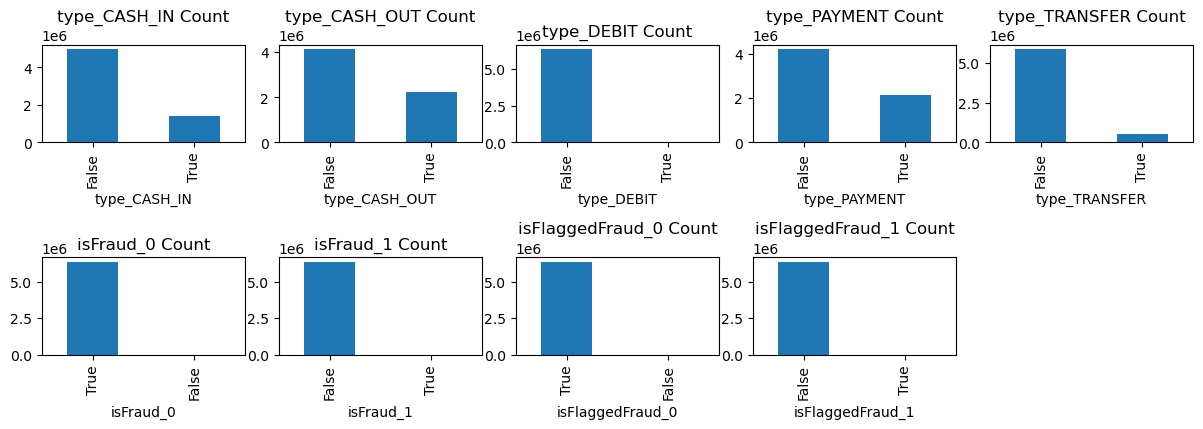

In [75]:
# Visualizing Categorial features with bar plots after OneHot Encoding
one_hot_features = df_encoded.columns[df_encoded.columns.str.contains('|'.join(categorical_features))]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(one_hot_features):
    plt.subplot(4, 5, i + 1)
    df_encoded[feature].value_counts().plot(kind='bar')
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.show()